# alternating blocked descent

- using SGD on $C$
- after each pass over the observed parts of the covariance matrix, use analyic solution for $A$, $\Pi$

In [ ]:
%matplotlib inline
import os

os.chdir('../scripts')
%run run_test.py

In [ ]:
np.asarray(np.eye(n), dtype=np.float)

In [6]:
import numpy as np
import os
os.chdir('../scripts')
from script_like import run_test

p = 100
n = 3
Ts = (100,1000)
k,l = 3,3
sub_pops = (np.arange(p), np.arange(p))
max_iter_nl=100
save_file = 'test'
run_test(p,n,Ts,k,l,sub_pops,max_iter_nl=max_iter_nl, save_file = save_file)

(p,n,T,k,l) =  (66, 3, 100, 3, 3)
max_iter =  100
sub_pops =  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]))
starting descent
using size-p mini-batches (coviarance columms)
finished % 0.0
f =  18259099131.2
finished % 10.0
f =  16148941996.0
finished % 20.0
f =  10780421880.7
finished % 30.0
f =  7890056410.93
finished % 40.0
f =  6985748117.85
finished % 50.0
f =  6248049403.42
finished % 60.0
f =  5309138305.02
finished % 70.0
f =  4318432740.72
finish

/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2079: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2087: RuntimeWarning: invalid value encountered in true_divide
  return (dot(X, X_T.conj())/fact).squeeze()


final squared error on observed parts: 6672.48926275
final squared error on overlapping parts: 6672.48926275
final squared error on cross-overlapping parts: nan
final squared error on stitched parts: nan
final squared error on stitched parts (C over first subpop sign-flipped): nan


/home/mackelab/Desktop/Projects/Stitching/code/code_le_stitch/iterSSID/python/core/SSID_Hankel_loss.py:452: RuntimeWarning: invalid value encountered in double_scalars
  return v.dot(v)/(2*np.sum(Om))


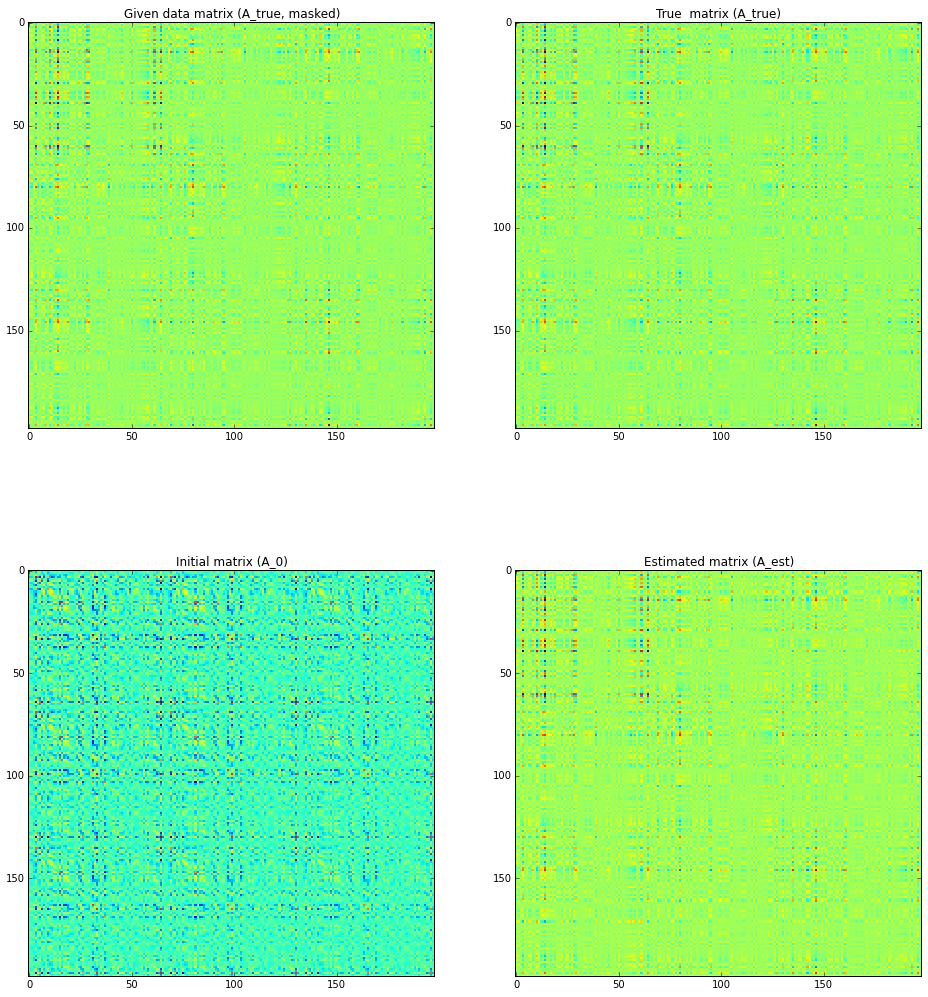


 observed covariance entries
correlation: 0.986951768442
obs. MSE: 30154.4353069

 stitched covariance entries
correlation: nan

 full time-lagged covariances, for time-lag m =  1
correlation:

/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2079: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2087: RuntimeWarning: invalid value encountered in true_divide
  return (dot(X, X_T.conj())/fact).squeeze()
/home/mackelab/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


 0.994164967772


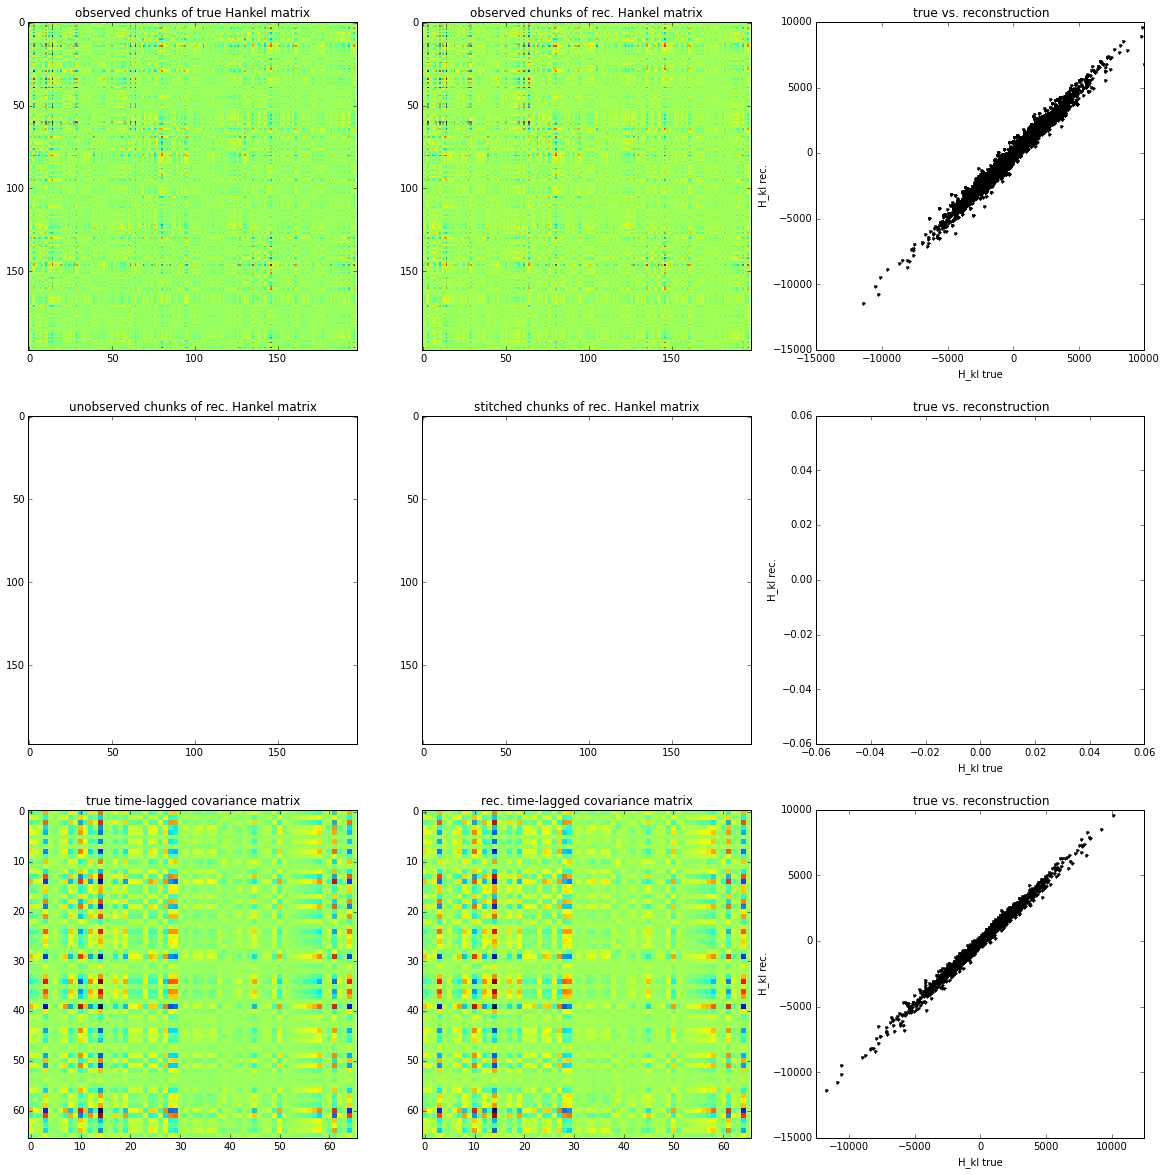

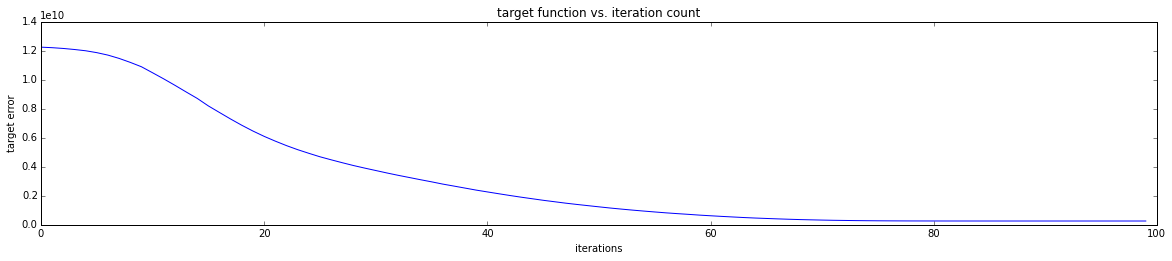

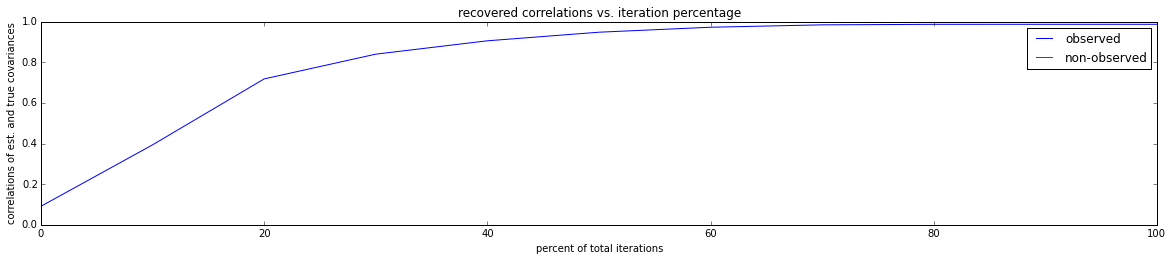

In [7]:
%matplotlib inline
import numpy as np
import os
res = np.load('../fits/nonlinear_cluster/testT1000.npz')

os.chdir('../core')
from utility import get_subpop_stats, draw_sys
from SSID_Hankel_loss import run_bad, plot_outputs_l2_gradient_test, l2_sis_setup
os.chdir('../dev')


obs_idx, idx_grp, co_obs, overlaps, overlap_grp, idx_overlap, Om, Ovw, Ovc = \
    get_subpop_stats(sub_pops=[res['sub_pops'][i] for i in range(res['r'])], p=res['p'], verbose=False)
f_i = l2_sis_setup(res['k'],res['l'],res['n'],res['Qs'],Om,idx_grp,obs_idx)[0] # get f to compute final errors
    
plot_outputs_l2_gradient_test(res['pars_true'].tolist(), res['pars_init'].tolist(), res['pars_est'].tolist(), 
                                   res['k'], res['l'], res['Qs'], 
                                   res['Qs_full'], Om, Ovc, Ovw, f_i, None, traces = tuple(res['traces'].tolist()),
                                   linearity=res['linearity'], idx_grp = idx_grp, co_obs = co_obs, 
                                   if_flip = True, m = 1)

In [8]:
res['y'].shape

(66, 1000)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import fmin_bfgs, check_grad
import glob, os

os.chdir('../core')
from utility import get_subpop_stats, draw_sys
from SSID_Hankel_loss import run_bad, plot_outputs_l2_gradient_test, l2_sis_setup
os.chdir('../dev')

# load ancient code for drawing from LDS ...
os.chdir('../../../../pyRRHDLDS/core')
import ssm_scripts
import ssm_fit
os.chdir('../../code_le_stitch/iterSSID/python/dev')


p,n,nr = 100, 20, 10
k,l = 2,2

T = np.inf

eig_m_r, eig_M_r, eig_m_c, eig_M_c = 0.8, 0.99, 0.8, 0.99

batch_size = p # batch_size = 1 (size-1 mini-batches), p (column mini-batches), None (full gradients)

a, b1, b2, e = 0.001, 0.9, 0.99, 1e-8
max_iter_nl =  100
max_iter_lin = 0
reps = 1

verbose=True

# create subpopulations

#sub_pops = (np.arange(0,200), np.arange(100,300), np.arange(200,400), np.arange(300,p))
#sub_pops = (np.arange(0,2*p//10), np.arange(p//10,3*p//10), np.arange(2*p//10,4*p//10), np.arange(3*p//10,5*p//10),
#            np.arange(4*p//10,6*p//10), np.arange(5*p//10,7*p//10), np.arange(6*p//10,8*p//10), 
#            np.arange(7*p//10,9*p//10), np.arange(8*p//10,p))

sub_pops = (np.arange(0,p//2+1), np.arange(p//2-1,p))
#sub_pops = (np.arange(10,p), np.arange(0,p-10))
#sub_pops = (np.arange(0,p), np.arange(0,p))

obs_idx, idx_grp, co_obs, overlaps, overlap_grp, idx_overlap, Om, Ovw, Ovc = \
    get_subpop_stats(sub_pops=sub_pops, p=p, verbose=False)

# draw system matrices    
ev_r = np.linspace(eig_m_r, eig_M_r, nr)
ev_c = np.exp(2 * 1j * np.pi * np.random.uniform(size= (n - nr)//2))
ev_c = np.linspace(eig_m_c, eig_M_c, (n - nr)//2) * ev_c

calc_stats = True if T == np.inf else False
pars_true, Qs, Qs_full = draw_sys(p=p,n=n,k=k,l=l,Om=Om, nr=nr, ev_r=ev_r,ev_c=ev_c,calc_stats=calc_stats)
pars_true['d'], pars_true['mu0'], pars_true['V0'] = np.zeros(p), np.zeros(n), pars_true['Pi'].copy()

pars_true['A'] = np.zeros((n,n))
pars_true['R'] = 10e-5 * np.ones(p)

if calc_stats:
    x,y = np.zeros((n,0)), np.zeros((p,0))
else:
    x,y,_ = ssm_scripts.sim_data(pars=pars_true, t_tot= T ) 
    x,y = x[:,:,0], y[:,:,0]
    for m in range(k+l):
        plt.subplot(1,2,1)
        plt.imshow(Qs_full[m], interpolation='none')
        plt.subplot(1,2,2)
        plt.imshow(np.cov(y[:,m:m-(k+l)], y[:,:-(k+l)])[:p,p:], interpolation='none')    
        Qs_full[m] = np.cov(y[:,m:m-(k+l)], y[:,:-(k+l)])[:p,p:]
        Qs[m] = np.cov(y[:,m:m-(k+l)], y[:,:-(k+l)])[:p,p:]
        plt.show()

for rep in range(reps):        
    
    linearity = 'False'
    stable = True
    pars_init, pars_est, traces = run_bad(k=k,l=l,n=n,Qs=Qs,Om=Om,
                                          sub_pops=sub_pops,idx_grp=idx_grp,co_obs=co_obs,obs_idx=obs_idx,
                                          linearity=linearity,stable=stable,init='default',
                                          a=a,b1=b1,b2=b2,e=e,max_iter=max_iter_nl,batch_size=batch_size,
                                          verbose=verbose)
    f_i = l2_sis_setup(k,l,n,Qs,Om,idx_grp,obs_idx)[0] # get f to compute final errors
    plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
                                       Qs_full, Om, Ovc, Ovw, f_i, None, traces = traces,
                                       linearity=linearity, idx_grp = idx_grp, co_obs = co_obs, 
                                       if_flip = True, m = 1)
    
    
    """
    linearity = 'first_order'
    stable = False
    _, pars_est, traces = run_bad(k=k,l=l,n=n,Qs=Qs,Om=Om,
                                          sub_pops=sub_pops,idx_grp=idx_grp,co_obs=co_obs,obs_idx=obs_idx,
                                          linearity=linearity,stable=stable,init=pars_est,
                                          a=a,b1=b1,b2=b2,e=e,max_iter=max_iter_nl,batch_size=batch_size)
    f_i = l2_sis_setup(k,l,n,Qs,Om,idx_grp,obs_idx)[0] # get f to compute final errors
    plot_outputs_l2_gradient_test(pars_true, pars_init_ssid, pars_est, k, l, Qs, 
                                       Qs_full, Om, Ovc, Ovw, f_i, None, traces = traces,
                                       linear=False, idx_grp = idx_grp, co_obs = co_obs, 
                                       if_flip = True, m = 1)    
    """
    
    """
    linearity = 'True'
    stable = False
    pars_init_linear = pars_est.copy()
    pars_init_linear['A'], pars_init_linear['Pi'] = None, None 
    pars_init_linear, pars_est, traces = run_bad(k=k,l=l,n=n,Qs=Qs,Om=Om,
                                          sub_pops=sub_pops,idx_grp=idx_grp,co_obs=co_obs,obs_idx=obs_idx,
                                          linearity=linearity,stable=stable,init=pars_init_linear,
                                          a=a,b1=b1,b2=b2,e=e,max_iter=max_iter_lin,batch_size=batch_size,
                                          verbose=verbose)
    plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
                                       Qs_full, Om, Ovc, Ovw, f_i, None, traces = traces,
                                       linearity=linearity, idx_grp = idx_grp, co_obs = co_obs, 
                                       if_flip = True, m = 1)
    """


# just one more turn...

In [ ]:
max_iter = 1000

linearity = 'False'
stable = False
_, pars_est, traces = run_bad(k=k,l=l,n=n,Qs=Qs_full,Om=Om,
                              sub_pops=sub_pops,idx_grp=idx_grp,co_obs=co_obs,obs_idx=obs_idx,
                              linearity=linearity,stable=stable,init=pars_est,
                              a=a,b1=b1,b2=b2,e=e,max_iter=max_iter,batch_size=batch_size)
f_i = l2_sis_setup(k,l,n,Qs,Om,idx_grp,obs_idx)[0] # get f to compute final errors
plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
                                   Qs_full, Om, Ovc, Ovw, f_i, None, traces = traces,
                                   linearity=linearity, idx_grp = idx_grp, co_obs = co_obs, 
                                   if_flip = True, m = 1)

plt.figure(figsize=(15,8))
plt.plot(range(0, 110, 10), traces[1].T)
plt.title('corrs as function of steps (10% max_iter increments)')
plt.show()

In [ ]:
max_iter = 200

linearity = 'True'
stable = False
_, pars_est, traces = run_bad(k=k,l=l,n=n,Qs=Qs_full,Om=Om,
                              sub_pops=sub_pops,idx_grp=idx_grp,co_obs=co_obs,obs_idx=obs_idx,
                              linearity=linearity,stable=stable,init=pars_est,
                              a=a,b1=b1,b2=b2,e=e,max_iter=max_iter,batch_size=batch_size)
f_i = l2_sis_setup(k,l,n,Qs,Om,idx_grp,obs_idx)[0] # get f to compute final errors
plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
                                   Qs_full, Om, Ovc, Ovw, f_i, None, traces = traces,
                                   linearity=linearity,  idx_grp = idx_grp, co_obs = co_obs, 
                                   if_flip = True, m = 1)    


# analysis of results

## check linearity of extracted latent covariances

In [ ]:
import SDLS

pars = pars_est
A, X = SSID_Hankel_loss.s_A_l2_Hankel_bad_sis(pars['C'],k,l,Qs,idx_grp,co_obs, linear=True,stable=False,A_old=None)

print('checking MSE solution for A')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(A, interpolation='none')
plt.title('MSE solution for A')
plt.subplot(1,2,2)
try:
    plt.imshow(pars['A'], interpolation='none')
except:
    pass
plt.title('pars[A]')
plt.show()

try:
    print('eig(pars[A])', np.sort(np.linalg.eigvals(pars['A'])))
except:
    pass
print('eig(A_rec)', np.sort(np.linalg.eigvals(A)))
print('MSE A: ', np.mean((pars['A'] - A)**2))


X1,X2 = np.zeros((n, n*(k+l-2))), np.zeros((n, n*(k+l-2)))
for m in range(k+l-2):
    X1[:,m*n:(m+1)*n] = X[:,m].reshape(n,n)
    X2[:,m*n:(m+1)*n] = X[:,m+1].reshape(n,n)

m = 3
print('checking MSE solution for X, m = ', m)
AmPi = np.linalg.matrix_power(pars['A'],m ).dot(pars['Pi'])
X_m  = X[:,m-1].reshape(n,n)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow( AmPi, interpolation='none')
plt.title('pars cov(x_{t+m), x_t) = A^m Pi')
plt.subplot(1,3,2)
plt.imshow( X_m, interpolation='none')
plt.title('est. cov(x_{t+m), x_t) = C^d Qs[m] C^d.T')
#print( 'A^m Pi - X_m' , np.mean((AmPi - X_m)**2) )
#print( 'A^m Pi - X_m^T' , np.mean((AmPi - X_m.T)**2) )


AX1     = np.zeros((n*(k+l-1),n))
As = np.empty((n*(k+l-1),n))
XT = np.empty((n*(k+l-1),n))
for m_ in range(k+l-1):
    XT[m_*n:(m_+1)*n,:] = X[:,m_].reshape(n,n)
    As[m_*n:(m_+1)*n,:] = np.linalg.matrix_power(A,m_+1)
for m_ in range(1,k+l-1):
    AX1[(m_)*n:(m_+1)*n,:] = A.dot(XT[(m_-1)*n:m_*n,:])
    
Pie,_,norm_res,muv,r,fail = SDLS.sdls(A=As,B=XT, X0=0.5*pars['Pi'],Y0=None,tol=1e-3,verbose=True)
#Pie = SSID_Hankel_loss.s_Pi_l2_Hankel_bad_sis(X,A,k,l,Qs,Pi=None,verbose=True)

print('MSE Pi: ', np.mean((pars['Pi'] - Pie)**2))

print('MSE for As Pi - Xms' , np.mean((As.dot(Pie) - XT)**2) )

plt.subplot(1,3,3)
plt.imshow( np.linalg.matrix_power(A,m ).dot(Pie), interpolation='none')
plt.title('reconstr. cov(x_{t+m), x_t) = A_hat^m Pi_hat')
plt.show()

plt.figure(figsize=(20,12))
plt.subplot(4,1,1)
plt.imshow(XT.T, interpolation='none')
plt.title('data est. for latent covs')
plt.subplot(4,1,2)
plt.imshow( AX1.T, interpolation='none')
plt.title('A * [X1, X2, ...]')
plt.subplot(4,1,3)
plt.imshow((As.dot(pars['Pi'])).T, interpolation='none')
plt.title('param est. for latent covs, using pars[Pi]')
plt.subplot(4,1,4)
plt.imshow((As.dot(Pie)).T, interpolation='none')
plt.title('param est. for latent covs, using MSE Pi')
plt.show()
print( 'A^m Pi - X_m' , np.mean((np.linalg.matrix_power(A,m).dot(Pie) - X[:,m-1].reshape(n,n))**2) )
print( 'A X_{m-1} - X_m' , np.mean((A.dot(X1) - X2)**2) )

plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.plot(XT.reshape(-1,), XT.reshape(-1,), 'k.')
plt.title('recov. cov vs. recov. cov (for scales)')
plt.subplot(1,4,2)
plt.plot(XT[n:,:].reshape(-1,), AX1[n:,:].reshape(-1,),'k.')
plt.title('recov. cov vs. first-order reconstruction')
plt.subplot(1,4,3)
plt.plot(XT.reshape(-1,), (As.dot(pars['Pi'])).reshape(-1,), 'k.')
plt.title('recov. cov vs. full reconstruction with pars[Pi]')
plt.subplot(1,4,4)
plt.plot(XT.reshape(-1,), (As.dot(Pie)).reshape(-1,), 'k.')
plt.title('recov. cov vs. full reconstruction with least-squares Pi')
plt.show()

# extracting $\\Pi$ from latent covariances given $A$

In [ ]:
%matplotlib inline
import os
import numpy as np
import scipy.stats as stats
os.chdir('../core')
import SDLS
os.chdir('../dev')
import matplotlib.pyplot as plt

sig, tol = 1, 10e-2
n = 30
V = np.random.normal(size=(n,n))
V = V / np.sum(V**2,0).reshape(1,-1)
Adyn = V.dot(np.diag(np.linspace(0.8, 0.99,n))).dot(np.linalg.inv(V))
Pi = np.outer(np.linspace(0.5,1.0,n), np.linspace(0.5,1.0,n))

A = np.zeros((4*n,n))
B = np.zeros((4*n,n))
for i in range(4):
    B[i*n:(i+1)*n,:] = np.linalg.matrix_power(Adyn,i+1).dot(Pi)
    A[i*n:(i+1)*n,:] = np.linalg.matrix_power(Adyn,i+1)
    
B += sig * np.random.normal(size=B.shape)
    
Pie,Y,norm_res,muv,r,fail = SDLS.sdls(A,B,X0=None,Y0=None,tol=tol,verbose=False)

print('maximal absolute single-entry deviation of AX and B: ', np.max(np.abs(A.dot(Pie) - B)))
print('maximal absolute single-entry deviation of Pi and Pi_est: ', np.max(np.abs(Pie - Pi)))

plt.subplot(1,2,1)
plt.imshow(Pie,interpolation='none')
plt.subplot(1,2,2)
plt.imshow(Pi,interpolation='none')
plt.show()

for i in range(5):
    V = np.random.normal(size=(n,n))
    V = V / np.sum(V**2,0).reshape(1,-1)
    Adyn = V.dot(np.diag(np.linspace(0.8, 0.99,n))).dot(np.linalg.inv(V))
    Pi = stats.wishart.rvs(df=n, scale=np.eye(n))

    A = np.zeros((4*n,n))
    B = np.zeros((4*n,n))
    for i in range(4):
        B[i*n:(i+1)*n,:] = np.linalg.matrix_power(Adyn,i+1).dot(Pi)
        A[i*n:(i+1)*n,:] = np.linalg.matrix_power(Adyn,i+1)        
    B += sig * np.random.normal(size=B.shape)
    
    Pie,Y,norm_res,muv,r,fail = SDLS.sdls(A,B,X0=None,Y0=None,tol=tol,verbose=False)
    print('maximal absolute single-entry deviation of AX and B: ', np.max(np.abs(A.dot(Pie) - B)))
    print('maximal absolute single-entry deviation of Pi and Pi_est: ', np.max(np.abs(Pie - Pi)))
    
    plt.subplot(1,2,1)
    plt.imshow(Pie,interpolation='none')
    plt.subplot(1,2,2)
    plt.imshow(Pi,interpolation='none')
    plt.show()    


In [ ]:
    if not traces is None:
        if isinstance(traces, np.ndarray):
            fs, len_traces = traces, 1
        elif isinstance(traces, tuple):
            fs, len_traces = traces[0], len(traces)  
    fs

In [ ]:
plt.imshow(pars['Pi'], interpolation='none')
plt.show()
plt.imshow(Pie, interpolation='none')
plt.show()
plt.plot(pars['Pi'].reshape(-1,), Pie.reshape(-1,), '.')
plt.show()

In [ ]:
from scipy.io import savemat # store results for comparison with Matlab code   

os.chdir('../fits/')

save_file = 'nousbad_p50n20r2'

save_file_m = {'A_true':pars_true['A'],
               #'B_true':pars_true['B'],
               'Pi_true' : pars_true['Pi'], 
               'C_true' : pars_true['C'],
               'A_0': pars_init_ssid['A'],
               #'B_0': pars_init['B'],
               'Pi_0': pars_init_ssid['Pi'],
               'C_0': pars_init_ssid['C'],
               'A_est': pars_est['A'],
               #'B_est':  pars_est['B'],
               'Pi_est' :  pars_est['Pi'], 
               'C_est' :  pars_est['C']}

savemat(save_file,save_file_m) # does the actual saving

pars_true_vec = np.hstack((pars_true['A'].reshape(n*n,),
                    pars_true['Pi'].reshape(n*n,),
                    pars_true['C'].reshape(p*n,)))
pars_init_vec = np.hstack((pars_init_ssid['A'].reshape(n*n,),
                    pars_init_ssid['Pi'].reshape(n*n,),
                    pars_init_ssid['C'].reshape(p*n,)))
pars_est_vec  = np.hstack((pars_est['A'].reshape(n*n,),
                    pars_est['Pi'].reshape(n*n,),
                    pars_est['C'].reshape(p*n,)))

np.savez(save_file, 
         pars_0_vec=pars_init_vec,
         pars_true_vec=pars_true_vec, 
         pars_est_vec=pars_est_vec)  

# Stochastic gradient descent
- three variants
    - size-1 mini-batches (batch_size = 1), zips through all observed entries of $\mbox{cov}(y_{t+m},y_t)$ and computes gradients from one at time
    - column mini-batches (batch_size = p), zips through all columns of $\mbox{cov}(y_{t+m},y_t)$ and computes gradients from observed entries 
    - batch-gradients (batch_size = None), computes a full gradient using all observed entries $\mbox{cov}(y_{t+m},y_t)$ at the same time
    
- mini-batch gradients use Adam for following the gradients with momentum and with re-normalising of gradients along each dimension. Full gradients use plain gradient descent.
- max_iter is defined as the number of 'zips' through the data set. Thus for different batch sizes, max_iter fixes the amount of information visited within the data covariance matrices, *not* the number of gradient steps 

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import fmin_bfgs, check_grad
import glob, os

os.chdir('../core')
from utility import get_subpop_stats, draw_sys
from SSID_Hankel_loss import f_l2_Hankel, l2_sis_setup, g_l2_Hankel_sis, plot_outputs_l2_gradient_test
from SSID_Hankel_loss import yy_Hankel_cov_mat, l2_sis_draw, adam_zip, adam_zip_stable
import SDLS
os.chdir('../dev')

p,n = 10,3
k,l = 3,3

nr = 3

batch_size = p # batch_size = 1 (size-1 mini-batches), p (column mini-batches), None (full gradients)

a, a_A, b1, b2, e = 0.0001, 0.0000001, 0.9, 0.99, 1e-8
max_iter = 1000

gammas = np.array([10e-8])
tau = 0.5

# create subpopulations
sub_pops = (np.arange(0,p//2+1), np.arange(p//2-1,p))

# draw system matrices    
ev_r = np.linspace(0.8, 0.999, nr)
ev_c = np.exp(2 * 1j * np.pi * np.random.uniform(size= (n - nr)//2))
ev_c = np.linspace(0.8, 0.999, (n - nr)//2) * ev_c

if p < 200:
    print('sub_pops', sub_pops)
obs_idx, idx_grp, co_obs, overlaps, overlap_grp, idx_overlap, Om, Ovw, Ovc = \
    get_subpop_stats(sub_pops, p, verbose=False)
pars_true, Qs, Qs_full = draw_sys(p,n,k,l,Om, nr, ev_r,ev_c)
f_base, _ = l2_sis_setup(k,l,n,Qs,Om,idx_grp,obs_idx)



def s(A):
    s = np.linalg.svd(A)[1]
    return np.isfinite( np.log( 1 - s**2 ).sum() )

err_est  = np.zeros((gammas.size, 4))
eigA_est = np.zeros((gammas.size, n))  
for rep in range(gammas.size):
    
    gamma = gammas[rep]

    def f_i(theta):

        A = theta[:n*n].reshape(n,n)        
        f_log_bar = - np.log( np.linalg.det(np.eye(n)-A.dot(A.T)) )

        if gamma == 0 and not np.isfinite(f_log_bar):
            f_log_bar = 0

        return f_base(theta) + gamma * f_log_bar
    
    def g_i(theta, idx_use, idx_co):

        A = theta[:n*n].reshape(n,n)        
        inv = np.linalg.solve(np.eye(n)-A.dot(A.T), np.eye(n))
        g_log_bar = np.zeros(theta.size)                                 
        g_log_bar[:n*n] = 2 * inv.dot(A).reshape(-1,)

        gamma_g_log_bar = gamma * g_log_bar
        if gamma == 0:
            gamma_g_log_bar[np.invert(np.isfinite(gamma_g_log_bar))] = 0
        return g_l2_Hankel_sis(theta,k,l,n,Qs,idx_use,idx_co) + gamma_g_log_bar

    A_0  = np.diag(np.random.uniform(low=0.7, high=0.8, size=n))
    B_0  = np.eye(n) #np.random.normal(size=(n,n))
    C_0  = np.random.normal(size=(p,n))
    Pi_0 = B_0.dot(B_0.T)
    
    pars_0 = np.hstack((A_0.reshape(n*n,),
                        B_0.reshape(n*n,),
                        C_0.reshape(p*n,)))

    def converged(theta_old, theta, e, t):
        if t >= max_iter:
            return True
        return False
        #return np.abs(f_i(theta_old) - f_i(theta)) < e
    
    print('starting descent')
    
    pars_est_vec, traces = adam_zip_stable(f_i,g_i,s,tau,pars_0.copy(),a,a_A,b1,b2,e,max_iter,converged,Om,idx_grp,co_obs,batch_size)
    fs, sig = traces
    
    A_est = pars_est_vec[:n*n].reshape(n,n)
    B_est = pars_est_vec[n*n:2*n*n].reshape(n,n)
    Pi_est = B_est.dot(B_est.T)
    C_est = pars_est_vec[-p*n:].reshape(p,n)

    print('gamma =', gamma)

    eigA_est[rep,:] = np.abs(np.sort(np.linalg.eigvals(A_est)))
    print('|eig(A_est)|', eigA_est[rep,:])
    print('|eig(A_true)|', np.abs(np.sort(np.linalg.eigvals(pars_true['A']))))


    err_est[rep,0] = f_l2_Hankel(pars_est_vec,k,l,n,Qs, Om)
    err_est[rep,1] = f_l2_Hankel(pars_est_vec,k,l,n,Qs,Ovw)
    err_est[rep,2] = f_l2_Hankel(pars_est_vec,k,l,n,Qs,Ovc)
    err_est[rep,3] = f_l2_Hankel(pars_est_vec,k,l,n,Qs_full,~Om)

    print('final squared error on observed parts:', 
          err_est[rep,0])
    print('final squared error on overlapping parts:', 
          err_est[rep,1])
    print('final squared error on cross-overlapping parts:',
          err_est[rep,2])
    print('final squared error on stitched parts:',
          err_est[rep,3])

    pars_init = {'A': A_0, 'C': C_0, 'Pi': Pi_0, 'B': B_0}
    pars_est  = {'A': A_est, 'C': C_est, 'Pi': Pi_est, 'B': B_est}
    #plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
    #                                   Qs_full, Om, Ovc, Ovw, f_i, g_i, if_flip = True)

    plt.figure(figsize=(20,8))
    plt.subplot(2,1,1)
    plt.plot(fs[:max_iter])
    plt.ylabel('f')
    plt.title('target function error')
    plt.subplot(2,1,2)
    plt.plot(sig[:max_iter])
    plt.ylabel('max sig(A)')
    plt.title('maximum singular value of A')
    plt.show()


# visualise overall results

plt.figure(figsize=(20,8))
plt.hsv()
plt.plot(err_est)
plt.hsv()
plt.xticks( np.arange(gammas.size), gammas)
plt.xlabel('\gamma')
plt.ylabel('MSE')
plt.legend(['obs.', 'overlap', 'cross-overl.', 'stitched'])
plt.title('Squared errors as function of log-barrier height')
plt.show()

plt.figure(figsize=(20,8))
clrs = np.zeros((gammas.size, 3))
clrs[:,2] = np.linspace(0.05, 0.99, gammas.size)
clrs[:,0] = np.linspace(0.05, 0.99, gammas.size)[::-1]
for i in range(gammas.size):    
    plt.plot(eigA_est[i,:], color=clrs[i,:])
    plt.hold(True)
plt.plot(np.sort(np.abs(np.linalg.eigvals(pars_true['A']))), 'k')
plt.plot([0, 1.1*n], [1, 1], 'r--')
plt.hot()
plt.xticks( np.arange(n), np.arange(n)+1)
plt.xlabel('# eigenvalue')
plt.ylabel('EV')
lgnd = [np.ceil(gammas[i]*100)/100 for i in range(gammas.size)]
lgnd.append('true')
lgnd.append('stability')
plt.legend(lgnd)
plt.axis([0, 1.1*n, plt.ylim()[0], plt.ylim()[1]])
plt.title('Eigenvalues as function of log-barrier height')
plt.show()

    

# just one more turn...

In [ ]:
gamma /= 1000
def f_i(theta):

    A = theta[:n*n].reshape(n,n)        
    f_log_bar = - np.log( np.linalg.det(np.eye(n)-A.dot(A.T)) )

    if gamma == 0 and not np.isfinite(f_log_bar):
        f_log_bar = 0

    return f_base(theta) + gamma * f_log_bar
def g_i(theta, idx_use, idx_co):

    A = theta[:n*n].reshape(n,n)        
    inv = np.linalg.solve(np.eye(n)-A.dot(A.T), np.eye(n))
    g_log_bar = np.zeros(theta.size)                                 
    g_log_bar[:n*n] = 2 * inv.dot(A).reshape(-1,)

    gamma_g_log_bar = gamma * g_log_bar
    if gamma == 0:
        gamma_g_log_bar[np.invert(np.isfinite(gamma_g_log_bar))] = 0
    return g_l2_Hankel_sis(theta,k,l,n,Qs,idx_use,idx_co) + gamma_g_log_bar

max_iter = 1000
def converged(theta_old, theta, e, t):
    if t >= max_iter:
        return True
    return False

pars_est_vec, fs = adam_zip_stable(f_i,g_i,s,tau,pars_est_vec.copy(),a,a_A,b1,b2,e,max_iter,converged,Om,idx_grp,co_obs,batch_size)
plt.figure(figsize=(20,8))
plt.plot(fs[:max_iter])
plt.show()



A_est = pars_est_vec[:n*n].reshape(n,n)
B_est = pars_est_vec[n*n:2*n*n].reshape(n,n)
Pi_est = B_est.dot(B_est.T)
C_est = pars_est_vec[-p*n:].reshape(p,n)

pars_init = {'A': A_0, 'C': C_0, 'Pi': Pi_0, 'B': B_0}
pars_est  = {'A': A_est, 'C': C_est, 'Pi': Pi_est, 'B': B_est}
plot_outputs_l2_gradient_test(pars_true, pars_init, pars_est, k, l, Qs, 
                                   Qs_full, Om, Ovc, Ovw, f_i, None, if_flip = True)

print('gamma', gamma)
print('eigvals[A]', np.linalg.eigvals(pars_est['A']))